# Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.


### Classification task:
- Decide about a good evaluation strategy beside accuracy and justify your choice.
- Apply **all** the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.
- Your submission should have at least the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. 
- Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create a report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization highly encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project1_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project1_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project1_Both_GroupXX_Lastname1_Lastname2.ipynb
    then zip these this file and the csv files of the two datasets into one file and submit. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. 

In [1]:
import pandas as pd
import numpy as np
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preparation

In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
import pylab as plt

Text(0.5, 1.0, 'Gender Histogram')

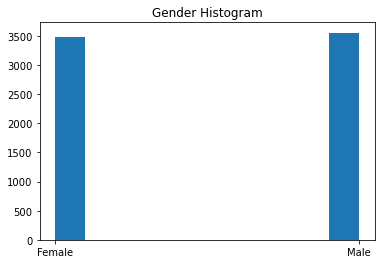

In [6]:
plt.hist(df['gender'])
plt.title('Gender Histogram')

The histogram show the number of males and females is a close difference.

<AxesSubplot:title={'center':'Contract Counts'}>

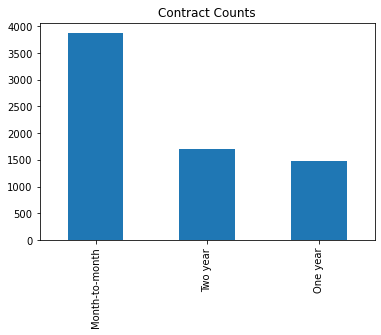

In [7]:
df['Contract'].value_counts().plot(kind='bar', title='Contract Counts')

The month to month customers are significantly higher.

<AxesSubplot:title={'center':'Payment Method Counts'}>

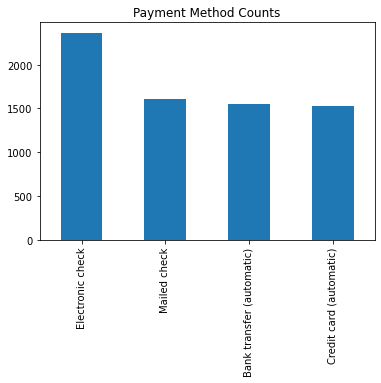

In [8]:
df['PaymentMethod'].value_counts().plot(kind='bar', title='Payment Method Counts')

The Electronic check is the most preffered mode of payment 

In [9]:
pclass_xt = pd.crosstab(df['PaymentMethod'], df['Churn'])
pclass_xt

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Text(0, 0.5, 'Churn')

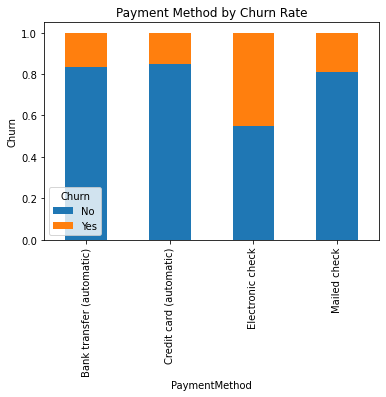

In [10]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Payment Method by Churn Rate')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')

Most customers who churn tend to use Electronic Check payment mode. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Reducing size of DF from 7043 to 1761
df = df.sample(frac =.25, random_state= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object

In [13]:
# Dropping Duplicates in Dataset

df.drop_duplicates(subset=None, keep= False, inplace= True)

In [14]:
# Dropping customerID column
df.drop(labels= 'customerID' , axis=1, inplace= True)

Converting binary values to respective 0s and 1s depending of freq

In [15]:
#Details of the Gender column
df.gender.describe()

count     1761
unique       2
top       Male
freq       926
Name: gender, dtype: object

In [16]:
#Replacing most frequent value->'Male' with 1 and 'Female' with 0
df["gender"].replace(to_replace='Male', value= 1, inplace=True)
df["gender"].replace(to_replace='Female', value= 0, inplace=True)

In [17]:
#Details of the Partner column
df.Partner.describe()

count     1761
unique       2
top         No
freq       918
Name: Partner, dtype: object

In [18]:
#Replacing most frequent value->'No' with 1 and 'Yes' with 0

df['Partner'].replace(to_replace = 'No', value = 1, inplace = True )
df['Partner'].replace(to_replace = 'Yes', value = 0, inplace = True )

In [19]:
df['Dependents'].describe()

count     1761
unique       2
top         No
freq      1242
Name: Dependents, dtype: object

In [20]:
#Replacing most frequent value->'No' with 1 and 'Yes' with 0

df['Dependents'].replace(to_replace = 'No', value = 1, inplace = True )
df['Dependents'].replace(to_replace = 'Yes', value = 0, inplace = True )

In [21]:
df['PhoneService'].describe()

count     1761
unique       2
top        Yes
freq      1586
Name: PhoneService, dtype: object

In [22]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['PhoneService'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['PhoneService'].replace(to_replace = 'No', value = 0, inplace = True )

In [23]:
df['PaperlessBilling'].describe()

count     1761
unique       2
top        Yes
freq      1015
Name: PaperlessBilling, dtype: object

In [24]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['PaperlessBilling'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['PaperlessBilling'].replace(to_replace = 'No', value = 0, inplace = True )

In [25]:
df['Churn'].describe()

count     1761
unique       2
top         No
freq      1298
Name: Churn, dtype: object

In [26]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['Churn'].replace(to_replace = 'No', value = 0, inplace = True )

Inducing random null values in the 6 columns

In [27]:
column_list = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
rand_st = 0
for column in column_list:
    df.loc[df.sample(frac = .17, random_state = rand_st).index,column] = np.NaN
    rand_st += 5

Missing values need to be between 5-10% 

In [28]:
# % of missing values
df.isna().sum().sum()/(len(df)*len(df.columns))

0.05093696763202726

Finding unique values, imputing null values with most frequent value and processing one hot vector for then next 6 variables

In [29]:
# Values in col Online Security
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [30]:
df['OnlineSecurity'].describe()

count     1462
unique       3
top         No
freq       739
Name: OnlineSecurity, dtype: object

In [31]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['OnlineSecurity'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['OnlineSecurity'].replace(to_replace = 'No', value = 1, inplace = True )
df['OnlineSecurity'].replace(to_replace = np.nan , value = 1, inplace = True )

In [32]:
dummies = pd.get_dummies(df['OnlineSecurity'], prefix = 'OnlineSecurity')
df[dummies.columns] = dummies
df.drop('OnlineSecurity', axis = 1, inplace = True)

In [33]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service', nan], dtype=object)

In [34]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['OnlineBackup'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['OnlineBackup'].replace(to_replace = 'No', value = 1, inplace = True )
df['OnlineBackup'].replace(to_replace = np.nan, value = 1, inplace = True )

In [35]:
dummies = pd.get_dummies(df['OnlineBackup'], prefix = 'OnlineBackup')
df[dummies.columns] = dummies
df.drop('OnlineBackup', axis = 1, inplace = True)

In [36]:
df['DeviceProtection'].unique()

array(['No', nan, 'No internet service', 'Yes'], dtype=object)

In [37]:
df['DeviceProtection'].describe()

count     1462
unique       3
top         No
freq       629
Name: DeviceProtection, dtype: object

In [38]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['DeviceProtection'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['DeviceProtection'].replace(to_replace = 'No', value = 1, inplace = True )
df['DeviceProtection'].replace(to_replace = np.nan, value = 1, inplace = True )

In [39]:
dummies = pd.get_dummies(df['DeviceProtection'], prefix = 'DeviceProtection')
df[dummies.columns] = dummies
df.drop('DeviceProtection', axis = 1, inplace = True)

In [40]:
df['TechSupport'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [41]:
df['TechSupport'].describe()

count     1462
unique       3
top         No
freq       691
Name: TechSupport, dtype: object

In [42]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['TechSupport'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['TechSupport'].replace(to_replace = 'No', value = 1, inplace = True )
df['TechSupport'].replace(to_replace = np.nan, value = 1, inplace = True )

In [43]:
dummies = pd.get_dummies(df['TechSupport'], prefix = 'TechSupport')
df[dummies.columns] = dummies
df.drop('TechSupport', axis = 1, inplace = True)

In [44]:
df['StreamingTV'].unique()

array(['Yes', 'No internet service', 'No', nan], dtype=object)

In [45]:
df['StreamingTV'].describe()

count     1462
unique       3
top        Yes
freq       571
Name: StreamingTV, dtype: object

In [46]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['StreamingTV'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['StreamingTV'].replace(to_replace = 'No', value = 1, inplace = True )
df['StreamingTV'].replace(to_replace = np.nan, value = 1, inplace = True )

In [47]:
dummies = pd.get_dummies(df['StreamingTV'], prefix = 'StreamingTV')
df[dummies.columns] = dummies
df.drop('StreamingTV', axis = 1, inplace = True)

In [48]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [49]:
df['StreamingMovies'].describe()

count     1462
unique       3
top        Yes
freq       582
Name: StreamingMovies, dtype: object

In [50]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['StreamingMovies'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['StreamingMovies'].replace(to_replace = 'No', value = 0, inplace = True )
df['StreamingMovies'].replace(to_replace = np.nan, value = 1, inplace = True )

In [51]:
dummies = pd.get_dummies(df['StreamingMovies'], prefix = 'StreamingMovies')
df[dummies.columns] = dummies
df.drop('StreamingMovies', axis = 1, inplace = True)

Identifying categorical variables with multiple inputs and converting to one hot vector

In [52]:
df.MultipleLines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [53]:
dummies = pd.get_dummies(df['MultipleLines'], prefix = 'MultipleLines')
df[dummies.columns] = dummies
df.drop('MultipleLines', axis = 1, inplace = True)

In [54]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [55]:
dummies = pd.get_dummies(df['InternetService'], prefix = 'InternetService')
df[dummies.columns] = dummies
df.drop('InternetService', axis = 1, inplace = True)

In [56]:
df.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [57]:
dummies = pd.get_dummies(df['Contract'], prefix = 'Contract')
df[dummies.columns] = dummies
df.drop('Contract', axis = 1, inplace = True)

In [58]:
df.PaymentMethod.unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [59]:
dummies = pd.get_dummies(df['PaymentMethod'], prefix = 'PaymentMethod')
df[dummies.columns] = dummies
df.drop('PaymentMethod', axis = 1, inplace = True)

Converting datatype 

In [60]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [61]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0,0,1,1,19,1,0,58.20,1045.25,0,...,1,0,0,0,1,0,0,0,1,0
4627,1,0,1,1,60,1,1,116.60,7049.50,0,...,0,1,0,0,1,0,0,1,0,0
3225,0,0,1,1,13,1,1,71.95,923.85,0,...,1,0,0,1,0,0,0,0,1,0
2828,1,0,1,1,1,1,0,20.45,20.45,0,...,0,0,1,0,0,1,0,0,0,1
3768,0,0,0,1,55,1,1,77.75,4266.40,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,0,0,0,1,71,1,1,83.30,5894.50,0,...,1,0,0,0,0,1,0,1,0,0
2551,0,0,1,1,12,1,0,19.45,227.45,0,...,0,0,1,1,0,0,1,0,0,0
5735,0,0,0,0,48,1,0,20.00,935.90,0,...,0,0,1,0,0,1,0,0,0,1
5096,1,0,0,0,71,1,0,86.85,6263.80,0,...,1,0,0,0,0,1,1,0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1761 non-null   int64  
 1   SeniorCitizen                            1761 non-null   int64  
 2   Partner                                  1761 non-null   int64  
 3   Dependents                               1761 non-null   int64  
 4   tenure                                   1761 non-null   int64  
 5   PhoneService                             1761 non-null   int64  
 6   PaperlessBilling                         1761 non-null   int64  
 7   MonthlyCharges                           1761 non-null   float64
 8   TotalCharges                             1758 non-null   float64
 9   Churn                                    1761 non-null   int64  
 10  OnlineSecurity_0                         1761 

In [63]:
df = df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 2200 to 450
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1758 non-null   int64  
 1   SeniorCitizen                            1758 non-null   int64  
 2   Partner                                  1758 non-null   int64  
 3   Dependents                               1758 non-null   int64  
 4   tenure                                   1758 non-null   int64  
 5   PhoneService                             1758 non-null   int64  
 6   PaperlessBilling                         1758 non-null   int64  
 7   MonthlyCharges                           1758 non-null   float64
 8   TotalCharges                             1758 non-null   float64
 9   Churn                                    1758 non-null   int64  
 10  OnlineSecurity_0                         1758 

array([[<AxesSubplot:xlabel='gender', ylabel='gender'>,
        <AxesSubplot:xlabel='SeniorCitizen', ylabel='gender'>,
        <AxesSubplot:xlabel='Partner', ylabel='gender'>,
        <AxesSubplot:xlabel='Dependents', ylabel='gender'>,
        <AxesSubplot:xlabel='tenure', ylabel='gender'>,
        <AxesSubplot:xlabel='PhoneService', ylabel='gender'>,
        <AxesSubplot:xlabel='PaperlessBilling', ylabel='gender'>],
       [<AxesSubplot:xlabel='gender', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='Partner', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='Dependents', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='tenure', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='PhoneService', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='PaperlessBilling', ylabel='SeniorCitizen'>],
       [<AxesSubplot:xlabel='gender', ylabel='Partner'>,
        <AxesSubplot:xlabel='SeniorCitizen', ylabel=

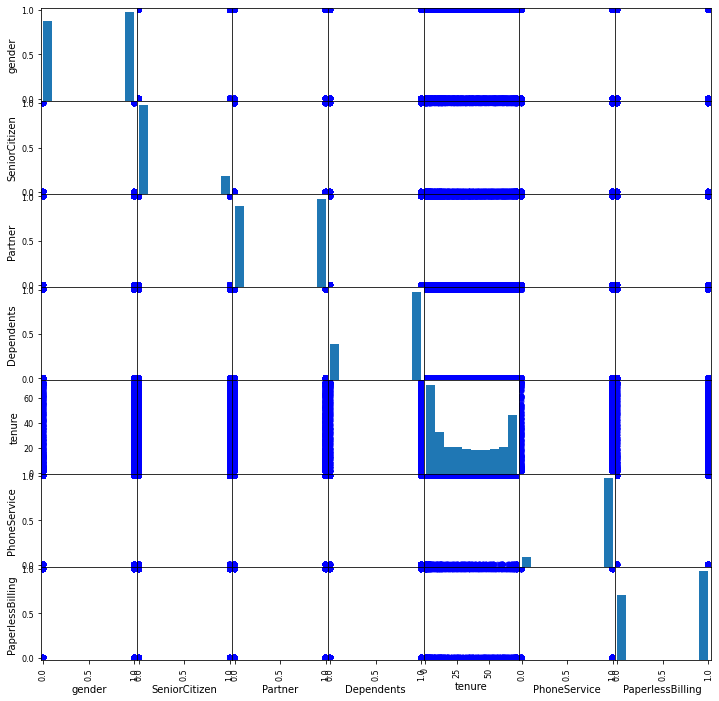

In [65]:
%matplotlib inline
from pandas.plotting import scatter_matrix
 
y = df['Churn']
X = df.drop('Churn',axis=1,inplace= False)

attributes = X.columns[:7]
scatter_matrix(X[attributes], figsize = (12,12), c = 'b', alpha = 0.8, marker = 'O')

## Data Splitting

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [67]:
y = df['Churn']
X = df.drop('Churn',axis=1,inplace= False)

In [68]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

We need to bring all the features into a fixed range without changing the overall behavior of the dataset. 
Since 19 columns of our dataset contain categorical values, we have used MinMaxScaler to scale our data and as we see from the ghaphs above the data is not normally distributed.. 



# Classification Models

For the second evaluation function, we will be using Confusion Matrix to visualize important predictive analytics like recall, specificity, accuracy, and precision. We can clearly see that how many instances we predicted completely correct, and how many instances we did not predict correctly.

## 1) KNN Classifier 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = range(1,10)
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn,param_grid, cv=5, scoring='accuracy')

In [70]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [71]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 6}
Best cross-validation score: 0.76


Using Grid Search with Cross-Validation and scoring accuracy, 
we have found our best parameter for KNN classification is with 6 neighbors. Our best cross-validation score is 0.76




In [72]:
pred_knn = grid.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,  roc_auc_score
confusion = confusion_matrix(y_test,pred_knn)
confusion

array([[210,  33],
       [ 66,  43]])

In our dataset,there are 210 datapoints that KNN predicted that the customers will not churn, predicted correctly. There are 33 datapoints that KNN predicted the customer ended up churning when they should not churn. 
There are 66 datapoints that KNN predicted should not churn when they should have churned. 
There are 43 cases that KNN predicted they would churn and were predicted correctly.


In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       243
           1       0.57      0.39      0.46       109

    accuracy                           0.72       352
   macro avg       0.66      0.63      0.64       352
weighted avg       0.70      0.72      0.70       352



In [75]:
grid_a=GridSearchCV(knn,param_grid, cv=5, scoring='roc_auc')


In [76]:
grid_a.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)}, scoring='roc_auc')

In [77]:
print("Best parameters: {}".format(grid_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_a.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.77


Using Grid Search with Cross-Validation and scoring is roc_auc, we have found our best parameter for KNN classification is with 9 neighbors. Our best cross-validation score is lower than accuracy scoring which is 0.77.


In [78]:
pred_knna = grid_a.predict(X_test)

In [79]:
confusion = confusion_matrix(y_test,pred_knna)
confusion

array([[201,  42],
       [ 54,  55]])

In our dataset,there are 201 datapoints that KNN predicted that the customers will not churn, predicted correctly. There are 42 datapoints that KNN predicted the customer ended up churning when they should not churn. 
There are 54 datapoints that KNN predicted should not churn when they should have churned. 
There are 55 cases that KNN predicted they would churn and were predicted correctly.

In [80]:
print(classification_report(y_test, pred_knna))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       243
           1       0.57      0.50      0.53       109

    accuracy                           0.73       352
   macro avg       0.68      0.67      0.67       352
weighted avg       0.72      0.73      0.72       352



## 2) Logistic Regression


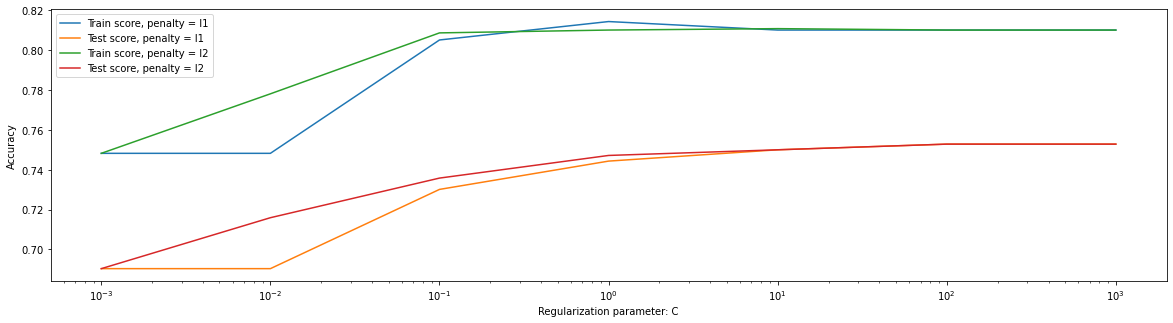

In [81]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

Plot our logistic regression model outcome out first then we will use grid search to find the best parameter. From this graph, it looks like when C=5 we have the best accuracy. So we can futher explore using grid search to see if C=5 is really the best for our model.

In [82]:
#from sklearn.linear_model import LogisticRegression
#c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l2']
hyperparam = dict(C = c_range, penalty = penalty, max_iter = [100000])
grid_search = GridSearchCV(LogisticRegression(),hyperparam, cv=5, scoring = 'accuracy' )

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100000], 'penalty': ['l2']},
             scoring='accuracy')

In [84]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'max_iter': 100000, 'penalty': 'l2'}
Best cross-validation score: 0.80


Using Grid search with Cross Validation, our Logistic Regression's best parameter is C=1, using L2 penalty. Our best store is 0.80.

In [85]:
pred_LR = grid_search.predict(X_test)

In [86]:
confusion_LR = confusion_matrix(y_test,pred_LR)
confusion_LR

array([[219,  24],
       [ 65,  44]])

In our dataset,there are 219 datapoints that Logistic predicted that the customers will not churn, predicted correctly. There are 24 datapoints that Logistic predicted the customer ended up churning when they should not churn. 
There are 65 datapoints that Logistic predicted should not churn when they should have churned. 
There are 44 cases that Logistic predicted they would churn and were predicted correctly.

In [87]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       243
           1       0.65      0.40      0.50       109

    accuracy                           0.75       352
   macro avg       0.71      0.65      0.66       352
weighted avg       0.73      0.75      0.73       352



In [88]:
grid_LR_a = GridSearchCV(LogisticRegression(),hyperparam, cv=10, scoring = 'roc_auc' )

In [89]:
grid_LR_a.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100000], 'penalty': ['l2']},
             scoring='roc_auc')

In [90]:
print("Best parameters: {}".format(grid_LR_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_LR_a.best_score_))

Best parameters: {'C': 0.1, 'max_iter': 100000, 'penalty': 'l2'}
Best cross-validation score: 0.83


Using Grid search with Cross Validation, our Logistic Regression's best parameter is C=0.1, using L2 penalty. Our best store is 0.83

In [91]:
pred_LR_a = grid_LR_a.predict(X_test)

In [92]:
confusion_LR_a = confusion_matrix(y_test,pred_LR_a)
confusion_LR_a

array([[218,  25],
       [ 68,  41]])

In our dataset,there are 218 datapoints that Logistic predicted that the customers will not churn, predicted correctly. 
There are 25 datapoints that Logistic predicted the customer ended up churning when they should not churn. 
There are 68 datapoints that Logistic predicted should not churn when they should have churned. 
There are 41 cases that Logistic predicted they would churn and were predicted correctly.

In [93]:
print(classification_report(y_test, pred_LR_a))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       243
           1       0.62      0.38      0.47       109

    accuracy                           0.74       352
   macro avg       0.69      0.64      0.65       352
weighted avg       0.72      0.74      0.71       352



## 3) Linear SVC

In [94]:
from sklearn.svm import LinearSVC

In [95]:
lsvc = LinearSVC()
#c_Range = [0.001,0.01,0.1,1,10,100]
#param_grid = dict(C=c_range, dual=False, max_iter = 10000)
param_grid = {'C': [0.001,0.01,0.1,1,10,100], 'dual': [False]}
print("Parameter grid:\n{}".format(param_grid))
grid_lsvc = GridSearchCV(lsvc,param_grid, cv=5, scoring = 'accuracy')

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'dual': [False]}


In [96]:
grid_lsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'dual': [False]},
             scoring='accuracy')

In [97]:
print("Best parameters: {}".format(grid_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lsvc.best_score_))

Best parameters: {'C': 10, 'dual': False}
Best cross-validation score: 0.80


Using  grid search with Cross Validation, we are found that our best parameter is C=10. The best score that we got is 0.80.

In [98]:
pred_lsvc = grid_lsvc.predict(X_test)

In [99]:
confusion_lsvc = confusion_matrix(y_test,pred_lsvc)
confusion_lsvc

array([[219,  24],
       [ 66,  43]])

In our dataset,there are 219 datapoints that Linear predicted that the customers will not churn, predicted correctly. There are 24 datapoints that Linear predicted the customer ended up churning when they should not churn. 
There are 66 datapoints that Linear predicted should not churn when they should have churned. 
There are 43 cases that Linear predicted they would churn and were predicted correctly.

In [100]:
print(classification_report(y_test, pred_lsvc))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       243
           1       0.64      0.39      0.49       109

    accuracy                           0.74       352
   macro avg       0.71      0.65      0.66       352
weighted avg       0.73      0.74      0.72       352



In [101]:
grid_lsvc_a=GridSearchCV(lsvc,param_grid, cv=5, scoring = 'roc_auc')


In [102]:
grid_lsvc_a.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'dual': [False]},
             scoring='roc_auc')

In [103]:
print("Best parameters: {}".format(grid_lsvc_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lsvc_a.best_score_))

Best parameters: {'C': 0.01, 'dual': False}
Best cross-validation score: 0.83


Using grid search with Cross Validation, we are found that our best parameter is C=0.01. The best score that we got is 0.83.


In [104]:
pred_lsvc_a = grid_lsvc_a.predict(X_test)

In [105]:
confusion_lsvc_a = confusion_matrix(y_test,pred_lsvc_a)
confusion_lsvc_a

array([[221,  22],
       [ 70,  39]])

In our dataset,there are 221 datapoints that Linear predicted that the customers will not churn, predicted correctly. There are 22 datapoints that Linear predicted the customer ended up churning when they should not churn. 
There are 70 datapoints that Linear predicted should not churn when they should have churned. 
There are 39 cases that Linear predicted they would churn and were predicted correctly.

In [106]:
print(classification_report(y_test, pred_lsvc_a))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       243
           1       0.64      0.36      0.46       109

    accuracy                           0.74       352
   macro avg       0.70      0.63      0.64       352
weighted avg       0.72      0.74      0.71       352



## 4) SVC(kernel = 'linear')


In [107]:
from sklearn.svm import SVC

In [108]:
param_linear = dict(kernel=['linear'], C=[1,2,3,4,5])
grid_linearKernel = GridSearchCV(SVC(), param_linear, cv=5, scoring='accuracy')

In [109]:
grid_linearKernel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['linear']},
             scoring='accuracy')

In [110]:
print("Best parameters: {}".format(grid_linearKernel.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_linearKernel.best_score_))

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.81


The best parameter for SVC model with kernel = 'linear' is C=1. The best cross-validation score is 0.81

In [111]:
pred_linearKernel = grid_linearKernel.predict(X_test)

In [112]:
confusion_linearKernel = confusion_matrix(y_test,pred_linearKernel)
confusion_linearKernel

array([[216,  27],
       [ 66,  43]])

In our dataset,there are 216 datapoints that Linear predicted that the customers will not churn, predicted correctly. There are 27 datapoints that Linear predicted the customer ended up churning when they should not churn. There are 66 datapoints that Linear predicted should not churn when they should have churned. There are 43 cases that Linear predicted they would churn and were predicted correctly.

In [113]:
print(classification_report(y_test, pred_linearKernel))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       243
           1       0.61      0.39      0.48       109

    accuracy                           0.74       352
   macro avg       0.69      0.64      0.65       352
weighted avg       0.72      0.74      0.72       352



In [114]:
grid_linearKernel_a = GridSearchCV(SVC(), param_linear, cv=10, scoring='roc_auc')

In [115]:
grid_linearKernel_a.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['linear']},
             scoring='roc_auc')

In [116]:
print("Best parameters: {}".format(grid_linearKernel_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_linearKernel_a.best_score_))

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.82


The best parameter for SVC model with kernel = 'linear' is C=1. The best cross-validation score is 0.82

In [117]:
print("Best parameters: {}".format(grid_linearKernel_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_linearKernel_a.best_score_))

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.82


In [118]:
pred_linearKernel_a = grid_linearKernel_a.predict(X_test)

In [119]:
confusion_linearKernel_a = confusion_matrix(y_test,pred_linearKernel_a)
confusion_linearKernel_a

array([[216,  27],
       [ 66,  43]])

In our dataset,there are 216 datapoints that Linear predicted that the customers will not churn, predicted correctly. There are 27 datapoints that Linear predicted the customer ended up churning when they should not churn. There are 66 datapoints that Linear predicted should not churn when they should have churned. There are 43 cases that Linear predicted they would churn and were predicted correctly.

In [120]:
print(classification_report(y_test, pred_linearKernel_a))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       243
           1       0.61      0.39      0.48       109

    accuracy                           0.74       352
   macro avg       0.69      0.64      0.65       352
weighted avg       0.72      0.74      0.72       352



## 5) SVC(kernel = 'poly')

In [121]:
param_poly = dict(kernel=['poly'], C=[1,2,3,4,5])
grid_poly = GridSearchCV(SVC(), param_poly, cv=10, scoring='accuracy')

In [122]:
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='accuracy')

In [123]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

Best parameters: {'C': 1, 'kernel': 'poly'}
Best cross-validation score: 0.79


Here we have our best parameter for poly kernel SVC model which is C= 1. Our best cross-validation score is 0.79 .


In [124]:
pred_poly = grid_poly.predict(X_test)

In [125]:
confusion_poly = confusion_matrix(y_test, pred_poly)
confusion_poly

array([[212,  31],
       [ 59,  50]])

In our dataset,there are 212 datapoints that Linear-poly predicted that the customers will not churn, predicted correctly. There are 31 datapoints that Linear-poly predicted the customer ended up churning when they should not churn. There are 59 datapoints that Linear-poly predicted should not churn when they should have churned. There are 50 cases that Linear-poly predicted they would churn and were predicted correctly.

In [126]:
print(classification_report(y_test, pred_poly))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       243
           1       0.62      0.46      0.53       109

    accuracy                           0.74       352
   macro avg       0.70      0.67      0.68       352
weighted avg       0.73      0.74      0.73       352



In [127]:
grid_poly_a = GridSearchCV(SVC(), param_poly, cv=10, scoring='roc_auc')

In [128]:
grid_poly_a.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='roc_auc')

In [129]:
print("Best parameters: {}".format(grid_poly_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly_a.best_score_))

Best parameters: {'C': 1, 'kernel': 'poly'}
Best cross-validation score: 0.77


Here we have our best parameter for poly kernel SVC model which is C= 1. Our best cross-validation score is 0.77 .


In [130]:
pred_poly_a = grid_poly_a.predict(X_test)

In [131]:
confusion_poly_a = confusion_matrix(y_test, pred_poly_a)
confusion_poly_a

array([[212,  31],
       [ 59,  50]])

In our dataset,there are 212 datapoints that Linear-poly predicted that the customers will not churn, predicted correctly. There are 31 datapoints that Linear-poly predicted the customer ended up churning when they should not churn. There are 59 datapoints that Linear-poly predicted should not churn when they should have churned. There are 50 cases that Linear-poly predicted they would churn and were predicted correctly.


In [132]:
print(classification_report(y_test, pred_poly_a))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       243
           1       0.62      0.46      0.53       109

    accuracy                           0.74       352
   macro avg       0.70      0.67      0.68       352
weighted avg       0.73      0.74      0.73       352



## 6) SVC(kernel = 'rbf')

In [133]:
param_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel':['rbf']}
grid_rbf = GridSearchCV(SVC(), param_rbf, cv=5, scoring = 'accuracy')

In [134]:
grid_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [135]:
print("Best parameters: {}".format(grid_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.80


Here we have our best parameter for rbf kernel SVC model which is C= 100. Our best cross-validation score is 0.80.


In [136]:
pred_rbf = grid_rbf.predict(X_test)

In [137]:
confusion_rbf = confusion_matrix(y_test, pred_rbf)
confusion_rbf

array([[218,  25],
       [ 66,  43]])

In our dataset,there are 218 datapoints that Linear-rbf predicted that the customers will not churn, predicted correctly. There are 25 datapoints that Linear-rbf predicted the customer ended up churning when they should not churn. There are 66 datapoints that Linear-rbf predicted should not churn when they should have churned. There are 43 cases that Linear-rbf predicted they would churn and were predicted correctly.


In [138]:
print(classification_report(y_test, pred_rbf))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       243
           1       0.63      0.39      0.49       109

    accuracy                           0.74       352
   macro avg       0.70      0.65      0.66       352
weighted avg       0.73      0.74      0.72       352



In [139]:
grid_rbf_a = GridSearchCV(SVC(), param_rbf, cv=5, scoring="f1")

In [140]:
grid_rbf_a.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='f1')

In [141]:
print("Best parameters: {}".format(grid_rbf_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rbf_a.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.56


Here we have our best parameter for rbf kernel SVC model which is C= 100. Our best cross-validation score is 0.56.


In [142]:
pred_rbf_a = grid_rbf_a.predict(X_test)

In [143]:
confusion_rbf_a = confusion_matrix(y_test, pred_rbf_a)
confusion_rbf_a

array([[218,  25],
       [ 66,  43]])

In our dataset,there are 218 datapoints that Linear-rbf predicted that the customers will not churn, predicted correctly. There are 25 datapoints that Linear-rbf predicted the customer ended up churning when they should not churn. There are 66 datapoints that Linear-rbf predicted should not churn when they should have churned. There are 43 cases that Linear-rbf predicted they would churn and were predicted correctly.


In [144]:
print(classification_report(y_test, pred_rbf_a))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       243
           1       0.63      0.39      0.49       109

    accuracy                           0.74       352
   macro avg       0.70      0.65      0.66       352
weighted avg       0.73      0.74      0.72       352



## 7) Decision Tree Classifier

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
para = dict(max_depth = [1,3,5,7,10])
grid_tree = GridSearchCV(DecisionTreeClassifier(), para, cv=10, scoring='accuracy')

In [147]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 10]}, scoring='accuracy')

In [148]:
print("Best parameters: {}".format(grid_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_tree.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.79


Here we have our best parameter for decision tree as max-depth=3. Our best cross-validation score is 0.79.


In [149]:
pred_tree = grid_tree.predict(X_test)

In [150]:
confusion_tree = confusion_matrix(y_test,pred_tree)
confusion_tree

array([[223,  20],
       [ 74,  35]])

In our dataset,there are 223 datapoints that decision tree predicted that the customers will not churn, predicted correctly. There are 20 datapoints that decision tree predicted the customer ended up churning when they should not churn. There are 74 datapoints that decision tree predicted should not churn when they should have churned. There are 35 cases that decision tree predicted they would churn and were predicted correctly.


In [151]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       243
           1       0.64      0.32      0.43       109

    accuracy                           0.73       352
   macro avg       0.69      0.62      0.63       352
weighted avg       0.72      0.73      0.70       352



In [152]:
grid_tree_a = GridSearchCV(DecisionTreeClassifier(), para, cv=10, scoring='roc_auc')

In [153]:
grid_tree_a.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 10]}, scoring='roc_auc')

In [154]:
print("Best parameters: {}".format(grid_tree_a.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_tree_a.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.80


Here we have our best parameter for decision tree as max-depth=3. Our best cross-validation score is 0.80.


In [155]:
pred_tree_a = grid_tree_a.predict(X_test)

In [156]:
confusion_tree_a = confusion_matrix(y_test,pred_tree_a)
confusion_tree_a

array([[223,  20],
       [ 74,  35]])

In our dataset,there are 223 datapoints that decision tree predicted that the customers will not churn, predicted correctly. There are 20 datapoints that decision tree predicted the customer ended up churning when they should not churn. There are 74 datapoints that decision tree predicted should not churn when they should have churned. There are 35 cases that decision tree predicted they would churn and were predicted correctly.

In [157]:
print(classification_report(y_test, pred_tree_a))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       243
           1       0.64      0.32      0.43       109

    accuracy                           0.73       352
   macro avg       0.69      0.62      0.63       352
weighted avg       0.72      0.73      0.70       352



**Best parameter**

Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

| Model | Best Parameters|
| --- | --- |
| Classification - KNN | N_Neighbors = 9 |
| Classification - Logistic Regression | C = 0.1|
| Classification - Linear SVC | C = 0.01 |
| SVR Linear Kernel | C = 1 |
| SVR Poly Kernel| C = 4 |
| SVR RBF Kernel | C = 100 , Gamma = 0.001|
| Decision Tree Regressor | max_depth = 3 |

**Fitting the models that have best parameters into our data**

Out of all the models, linear SVC and logistic has best cross-validation-score (0.83) when using the grid search to find the best parameters. So we fit them separately into our data and found out the train and test scores.

In [163]:
#Logistic Reg accuracy c = 0.1, penalty:l2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
LR = LogisticRegression(C=0.1, penalty = 'l2', max_iter = 10000)
trainScore = cross_val_score(LR, X_train, y_train)
testScore = cross_val_score(LR, X_test, y_test)
y_pred = cross_val_predict(LR, X_test, y_test, cv = 10)
print("Cross-validation scores: {}".format(trainScore))
print("Cross-validation scores: {}".format(testScore))

Cross-validation scores: [0.78014184 0.8113879  0.82562278 0.79359431 0.78647687]
Cross-validation scores: [0.73239437 0.70422535 0.72857143 0.68571429 0.67142857]


In [159]:
print("Average cross-validation score for training dataset: {:.2f}".format(trainScore.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(testScore.mean()))

Average cross-validation score for training dataset: 0.80
Average cross-validation score for test dataset: 0.70


In [160]:
#Linear SVC ACCURACY: c=0.01
linSVC = LinearSVC(C=0.01, max_iter = 10000)
trainScoreL = cross_val_score(linSVC, X_train, y_train)
testScoreL = cross_val_score(linSVC, X_test, y_test)
y_predL = cross_val_predict(linSVC, X_test, y_test, cv=10)
print("Cross-validation scores: {}".format(trainScoreL))
print("Cross-validation scores: {}".format(testScoreL))

Cross-validation scores: [0.79078014 0.8113879  0.8113879  0.79359431 0.78647687]
Cross-validation scores: [0.77464789 0.70422535 0.7        0.67142857 0.68571429]


In [161]:
print("Average cross-validation score for training dataset: {:.2f}".format(trainScoreL.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(testScoreL.mean()))

Average cross-validation score for training dataset: 0.80
Average cross-validation score for test dataset: 0.71


### Performance in testing Dataset
| Model |KNN (accuracy) | KNN (roc_auc) | Logistic Regression (accuracy) | Logistic Regression (roc_auc) | Linear SVC (accuracy)| Linear SVC (roc_auc) | SVC Linear Kernel (accuracy) | SVC Linear Kernel (roc_auc) | SVC Poly Kernel (accuracy) | SVC Poly (roc_auc) | SVC RBF (accuracy) | SVC RBF (F1) | Decision tree (accuracy) | Decision Tree (roc_auc) |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Params | k = 6 | k = 9 | C = 1 | C = 0.1 | C = 10 | C = 0.01 | C = 1 | C = 1 | C = 1 | C = 1 | C = 100, gamma = 0.001 | C=100, gamma = 0.001| max_depth = 3 | max_depth = 3 |
| Accuracy | 0.76 | 0.77 | 0.8 | 0.83 | 0.8 | 0.83 | 0.81 | 0.82 | 0.79 | 0.77 | 0.80 | 0.56 | 0.79 | 0.8 |
|F1-score(0)| 0.81 | 0.81 | 0.83 | 0.82 | 0.83 | 0.83 | 0.82| 0.82 | 0.82 | 0.82 | 0.83 | 0.83| 0.83 | 0.83 |
|F1-score(1) | 0.46 | 0.53 | 0.5 | 0.47| 0.49 | 0.46 | 0.48 | 0.48 | 0.53 | 0.53 | 0.49 | 0.49 | 0.43 | 0.43 |


Our best model is 'Linear SVC' for predicting the churn with test score of 0.71.